In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

from pymutspec.constants import possible_codons, possible_sbs12, possible_sbs192

sns.set_style()

In [3]:
# read spectra dataset
spectra192 = pd.read_csv('../../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
spectra192

,Gene,Class,Species,Mut,Observed,Expected,MutSpec
0,CO1,Mammalia,Crocuta_crocuta,A[A>C]A,NaN,0.000000,0.0
1,CO1,Mammalia,Crocuta_crocuta,A[A>C]C,NaN,0.000000,0.0
2,CO1,Mammalia,Crocuta_crocuta,A[A>C]G,NaN,0.000000,0.0
3,CO1,Mammalia,Crocuta_crocuta,A[A>C]T,NaN,0.000000,0.0
4,CO1,Mammalia,Crocuta_crocuta,C[A>C]A,NaN,13.666667,0.0
...,...,...,...,...,...,...,...
550267,CO3,Actinopteri,Cottus_gulosus,G[T>G]T,NaN,2.000000,0.0
550268,CO3,Actinopteri,Cottus_gulosus,T[T>G]A,NaN,4.000000,0.0
550269,CO3,Actinopteri,Cottus_gulosus,T[T>G]C,NaN,5.000000,0.0
550270,CO3,Actinopteri,Cottus_gulosus,T[T>G]G,NaN,6.000000,0.0


## Compare gene-classes spectra pairwisely

count    6.000000
mean     0.960953
std      0.010123
min      0.951134
25%      0.954313
50%      0.957781
75%      0.965103
max      0.978320
dtype: float64


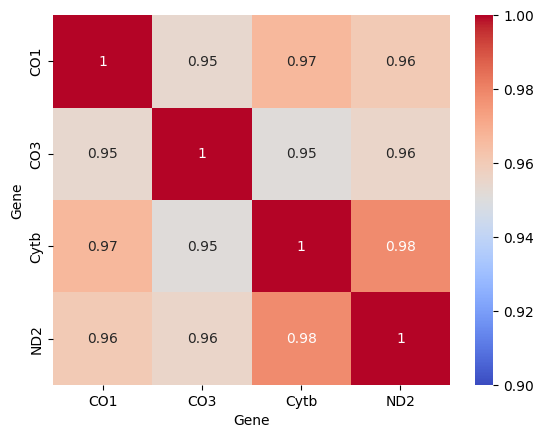

In [4]:
# compare gene-specific mean chordates spectra
gene_spectra192 = spectra192.set_index(['Gene', 'Class', 'Species', 'Mut'])\
    .MutSpec.unstack().mean(level=0)

gg_pair_raw = pdist(gene_spectra192, 'cosine')
gg_pair = pd.DataFrame(1-squareform(gg_pair_raw), 
             index=gene_spectra192.index, 
             columns=gene_spectra192.index)
print(pd.Series(1-gg_pair_raw).describe())
sns.heatmap(gg_pair, vmin=0.9, annot=True, cmap='coolwarm')
plt.savefig('./compare_gene_spectra.png')
plt.show()

count    190.000000
mean       0.785661
std        0.149127
min        0.321122
25%        0.713335
50%        0.825477
75%        0.907554
max        0.959085
dtype: float64


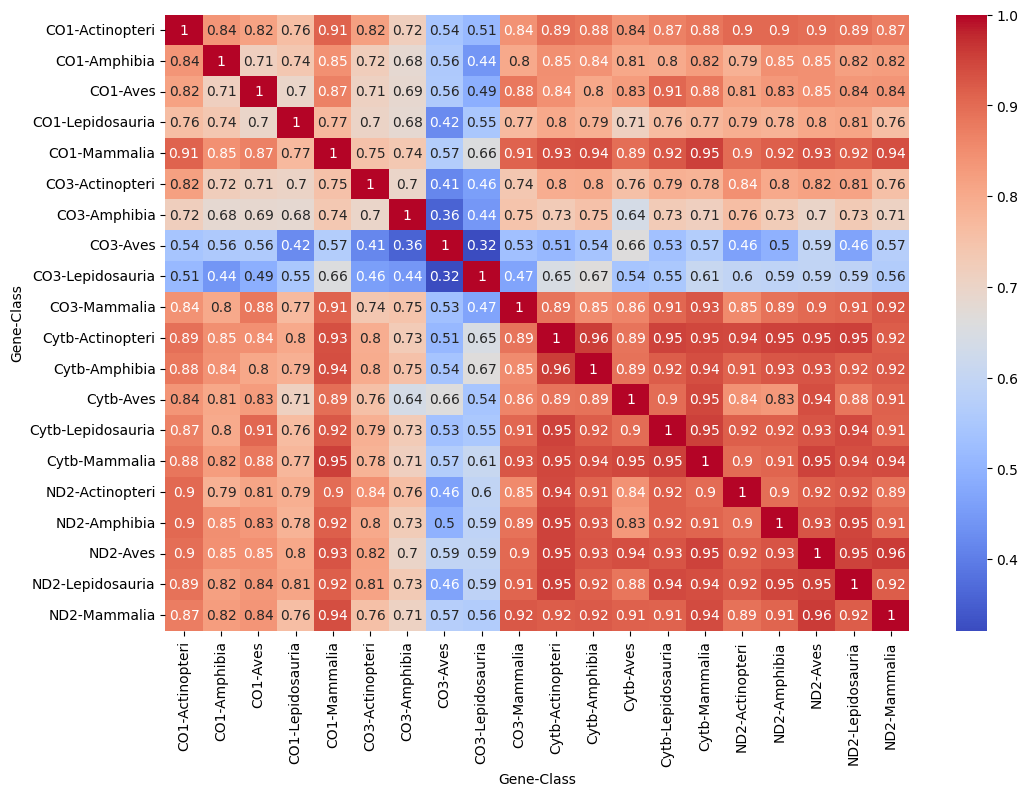

In [6]:
# compare gene-specific and class-specific mean spectra
gene_cls_spectra192 = spectra192.set_index(['Gene', 'Class', 'Species', 'Mut'])\
    .MutSpec.unstack().mean(level=[0, 1])

gg_pair_raw = pdist(gene_cls_spectra192, 'cosine')
gg_pair = pd.DataFrame(1-squareform(gg_pair_raw), 
             index=gene_cls_spectra192.index, 
             columns=gene_cls_spectra192.index)
print(pd.Series(1-gg_pair_raw).describe())

plt.figure(figsize=(12, 8))
sns.heatmap(gg_pair, annot=True, cmap='coolwarm')
plt.savefig('./compare_gene_cls_spectra.png')
plt.show()

## Read expected counts

In [7]:
# get species list for following merging
species = spectra192[['Gene', 'Class', 'Species']].drop_duplicates()
species.columns = species.columns.str.lower()
species

,gene,class,species
0,CO1,Mammalia,Crocuta_crocuta
192,CO1,Mammalia,Homo_sapiens
384,CO1,Mammalia,Eothenomys_melanogaster
576,CO1,Mammalia,Geomys_arenarius
768,CO1,Mammalia,Urocyon_cinereoargenteus
...,...,...,...
549312,CO3,Mammalia,Pan_troglodytes
549504,CO3,Mammalia,Bison_priscus
549696,CO3,Mammalia,Martes_zibellina
549888,CO3,Mammalia,Trachypithecus_phayrei


In [8]:
exp_freqs = pd.read_csv('../../1data_derivation/dataset/expected.csv')
exp_freqs = species.merge(exp_freqs)
exp_freqs

,gene,class,species,msa_nseqs,msa_ncols,acgt_share,A>C,A>G,A>T,C>A,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,CO1,Mammalia,Crocuta_crocuta,15,1542,0.999741,115.066667,173.333333,115.066667,71.466667,...,15.133333,9.800000,4.866667,1.133333,4.666667,4.400000,4.400000,5.066667,1.933333,2.066667
1,CO1,Mammalia,Homo_sapiens,499,1539,0.999939,114.446894,183.314629,114.446894,97.278557,...,12.016032,3.010020,1.997996,0.967936,2.987976,3.012024,2.887776,2.955912,1.012024,2.032064
2,CO1,Mammalia,Eothenomys_melanogaster,21,1539,0.999598,128.285714,199.333333,128.285714,77.904762,...,6.238095,2.761905,2.190476,1.000000,2.333333,2.000000,6.000000,4.904762,1.000000,3.714286
3,CO1,Mammalia,Geomys_arenarius,12,1530,1.000000,117.166667,188.583333,117.166667,39.333333,...,13.500000,9.666667,8.666667,1.333333,2.916667,3.666667,7.750000,5.000000,4.000000,8.000000
4,CO1,Mammalia,Urocyon_cinereoargenteus,51,1542,1.000000,96.313725,158.313725,96.313725,61.058824,...,11.568627,3.450980,4.980392,1.000000,2.490196,2.000000,5.941176,4.686275,1.509804,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,CO3,Mammalia,Pan_troglodytes,67,783,0.999828,56.985075,96.373134,56.985075,56.985075,...,1.014925,3.910448,1.000000,1.358209,0.000000,0.000000,1.940299,0.000000,0.029851,2.328358
2862,CO3,Mammalia,Bison_priscus,31,780,0.998842,49.709677,90.967742,49.709677,53.129032,...,3.032258,4.709677,0.000000,0.032258,0.000000,1.000000,1.000000,0.000000,0.032258,4.000000
2863,CO3,Mammalia,Martes_zibellina,30,783,1.000000,57.966667,97.133333,57.966667,42.933333,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.966667,2.066667,3.033333,0.000000,3.000000
2864,CO3,Mammalia,Trachypithecus_phayrei,22,783,1.000000,51.954545,99.909091,51.954545,38.454545,...,3.000000,4.636364,0.136364,1.090909,1.090909,3.318182,3.681818,2.045455,3.000000,2.045455


In [9]:
cxt_df = pd.read_csv('../../1data_derivation/dataset/exp_cxt_freqs.csv')
cxt_df = cxt_df.merge(exp_freqs[['gene', 'species', 'class']], on=['gene', 'species'])
cxt_df

,gene,species,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,class
0,ND2,Pica_pica,3.985714,6.600000,6.400000,5.957143,6.371429,8.028571,1.957143,11.371429,...,15.814286,4.885714,0.828571,2.571429,0.000000,9.571429,5.414286,4.000000,9.857143,Aves
1,ND2,Motacilla_tschutschensis,4.000000,9.069444,6.972222,3.013889,9.013889,9.333333,1.986111,21.069444,...,15.152778,4.097222,5.861111,3.000000,1.958333,5.986111,4.194444,2.000000,4.000000,Aves
2,ND2,Symposiachrus_trivirgatus,4.000000,7.057143,6.028571,3.314286,9.685714,10.914286,0.657143,18.800000,...,11.828571,4.885714,2.342857,5.000000,3.257143,11.142857,6.257143,2.000000,11.057143,Aves
3,ND2,Zonotrichia_capensis,4.909091,7.181818,6.454545,5.818182,8.181818,7.545455,1.000000,12.636364,...,16.909091,4.636364,1.000000,1.090909,3.363636,3.636364,3.000000,4.272727,6.909091,Aves
4,ND2,Poecile_montanus,4.925926,7.120370,6.000000,1.990741,7.990741,10.935185,3.870370,13.074074,...,14.620370,0.861111,2.925926,3.037037,2.064815,5.009259,4.055556,2.027778,1.074074,Aves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,CO3,Pan_troglodytes,3.119403,3.000000,7.880597,3.985075,4.104478,6.985075,3.000000,16.955224,...,12.537313,1.462687,1.626866,1.014925,0.970149,9.089552,4.880597,4.089552,6.388060,Mammalia
2862,CO3,Bison_priscus,3.000000,2.000000,9.000000,2.032258,3.870968,7.870968,5.000000,13.032258,...,12.870968,1.000000,1.967742,0.806452,1.000000,10.000000,3.000000,3.967742,9.000000,Mammalia
2863,CO3,Martes_zibellina,2.000000,2.100000,7.333333,1.000000,3.966667,4.100000,6.233333,15.766667,...,14.000000,1.966667,3.000000,1.633333,2.100000,6.066667,3.033333,2.000000,4.000000,Mammalia
2864,CO3,Trachypithecus_phayrei,6.045455,3.000000,6.909091,1.181818,2.136364,7.227273,3.954545,13.045455,...,20.681818,1.000000,0.636364,0.000000,0.000000,10.863636,4.863636,10.045455,6.545455,Mammalia


In [10]:
# num of non-zero cxts in species
# any possible trinucleotide context can be found in Cytb (only based on syn mutations), 
# but not every context can raise syn mutation
# count column in the table below means species count
nnz = (cxt_df[possible_codons] > 0).sum(axis=1).rename('nnonzero').to_frame()
nnz['class'] = cxt_df['class'].values
nnz.groupby('class').nnonzero.describe().drop(['mean', 'std'], axis=1).astype(int)

,count,min,25%,50%,75%,max
class,,,,,,
Actinopteri,693,49,60,62,63,64
Amphibia,182,53,60,62,63,64
Aves,512,51,57,59,61,64
Lepidosauria,379,51,60,62,63,64
Mammalia,1100,43,58,60,62,64


### Save supplementary tables with cytb expected sbs and contexts counts

In [11]:
average_class_cxt = cxt_df.set_index(['gene', 'class', 'species']).mean(level=[0, 1])#.T
average_class_cxt.columns.name = 'triplet'
average_class_cxt = average_class_cxt.T.sort_values(('Cytb', 'Mammalia'), ascending=False)
average_class_cxt.to_csv('./average_class_cxt_freqs.csv')
average_class_cxt

gene           ND2                                                       CO1  \
class         Aves   Mammalia Lepidosauria Actinopteri   Amphibia   Mammalia   
triplet                                                                        
CCT      23.987112  16.706190    18.586721   19.209665  16.845179  19.465975   
TCC      17.060217  10.781785     7.378075   10.245740   6.644723  13.474731   
TCT      16.650342  11.867311    10.283929   10.156470  10.769808  21.949335   
TAG      12.118706  13.625438    12.679543   13.324449  12.530973  26.398017   
ACT      16.534544  18.724203    16.206616   11.734531  12.255649  19.392580   
...            ...        ...          ...         ...        ...        ...   
CGT       0.389897   0.405761     0.302034    0.842186   0.597530   1.033947   
CGA       0.928010   0.653806     0.854953    1.615138   0.838224   0.622907   
CGC       0.885453   0.599829     0.858802    1.635556   1.065804   0.823060   
GGC       0.882925   0.322301     0.607644    2.102001   0.617432   0.580411   
AGG       0.724138   0.287050     0.477008    1.749717   0.310899   0.965155   

gene                                                         Cytb  \
class   Actinopteri       Aves Lepidosauria   Amphibia   Mammalia   
triplet                                                             
CCT       21.210207  29.331223    23.131764  16.243880  22.428191   
TCC       17.844437  24.536231    13.817464  11.185186  20.899921   
TCT       22.381432  24.532177    17.224952  18.698803  18.116616   
TAG       20.454937  28.177953    20.437970  18.948432  18.048474   
ACT       16.805831  24.797113    20.438582  14.057744  15.625537   
...             ...        ...          ...        ...        ...   
CGT        0.730419   0.593664     0.613043   1.151825   0.506581   
CGA        1.156228   0.406246     0.557634   0.452190   0.313939   
CGC        1.691845   0.480842     1.118322   1.832694   0.308838   
GGC        0.727217   0.144705     0.717544   1.407599   0.301270   
AGG        1.359519   0.548368     1.495344   1.316791   0.200211   

gene                                                          CO3              \
class   Lepidosauria Actinopteri   Amphibia       Aves   Mammalia Actinopteri   
triplet                                                                         
CCT        22.034367   22.498138  16.101692  32.615626  12.099241   11.746084   
TCC        16.797608   19.648027  13.804675  27.141427   9.155769   10.931973   
TCT        17.903246   19.027429  17.847466  17.858228  12.502144   12.415540   
TAG        11.881952   14.618468  12.686735  20.472508   9.247627    9.167656   
ACT        16.980098   15.358595  12.128718  19.663725  11.813458    9.881944   
...              ...         ...        ...        ...        ...         ...   
CGT         0.685455    1.270298   1.043666   0.490910   0.156078    0.352930   
CGA         0.440347    0.885401   0.689709   0.266899   0.374975    0.324554   
CGC         0.392186    1.166793   0.771870   0.660964   0.438335    0.722164   
GGC         0.415116    0.835824   0.808546   0.220179   0.736505    0.767589   
AGG         0.381617    0.495789   0.508884   0.168624   0.910794    1.813050   

gene                                       
class    Amphibia Lepidosauria       Aves  
triplet                                    
CCT      7.830726    13.677083  16.981823  
TCC      5.149532     9.261046  16.483150  
TCT      9.894175     9.153222  12.209135  
TAG      8.465264    10.305330  12.905948  
ACT      6.831250    12.283841  14.801346  
...           ...          ...        ...  
CGT      0.620748     0.030777   0.487888  
CGA      0.273016     0.217803   0.001563  
CGC      0.591383     0.364583   0.343125  
GGC      0.984779     1.241285   0.537728  
AGG      2.206122     1.253325   0.374787  

[64 rows x 20 columns]

In [12]:
average_class_cxt = exp_freqs.set_index(['gene', 'class', 'species'])[possible_sbs192]\
    .mean(level=[0, 1])
average_class_cxt.columns.name = 'Substitution'
average_class_cxt = average_class_cxt.T.sort_values(('Cytb', 'Mammalia'), ascending=False)
average_class_cxt.to_csv('./average_class_exp_freqs.csv')
average_class_cxt

gene                CO1                                                 \
class          Mammalia Actinopteri       Aves Lepidosauria   Amphibia   
Substitution                                                             
C[C>T]T       19.465975   21.210207  29.331223    23.131764  16.243880   
T[C>T]C       13.474731   17.844437  24.536231    13.817464  11.185186   
T[C>T]T       21.949335   22.381432  24.532177    17.224952  18.698803   
T[A>G]G       26.398017   20.454937  28.177953    20.437970  18.948432   
A[C>T]T       19.392580   16.805831  24.797113    20.438582  14.057744   
...                 ...         ...        ...          ...        ...   
A[G>C]G        0.000000    0.000000   0.000000     0.000000   0.000000   
A[G>C]T        0.000000    0.000000   0.000000     0.000000   0.000000   
A[G>T]C        0.000000    0.000000   0.000000     0.000000   0.000000   
A[G>T]A        0.000000    0.000000   0.000000     0.000000   0.000000   
A[A>C]A        0.000000    0.000000   0.000000     0.000000   0.000000   

gene               Cytb                                                 \
class          Mammalia Lepidosauria Actinopteri   Amphibia       Aves   
Substitution                                                             
C[C>T]T       22.428191    22.034367   22.498138  16.101692  32.615626   
T[C>T]C       20.899921    16.797608   19.648027  13.804675  27.141427   
T[C>T]T       18.116616    17.903246   19.027429  17.847466  17.858228   
T[A>G]G       18.048474    11.881952   14.618468  12.686735  20.472508   
A[C>T]T       15.625537    16.980098   15.358595  12.128718  19.663725   
...                 ...          ...         ...        ...        ...   
A[G>C]G        0.000000     0.000000    0.000000   0.000000   0.000000   
A[G>C]T        0.000000     0.000000    0.000000   0.000000   0.000000   
A[G>T]C        0.000000     0.000000    0.000000   0.000000   0.000000   
A[G>T]A        0.000000     0.000000    0.000000   0.000000   0.000000   
A[A>C]A        0.000000     0.000000    0.000000   0.000000   0.000000   

gene                ND2                                                 \
class              Aves   Mammalia Lepidosauria Actinopteri   Amphibia   
Substitution                                                             
C[C>T]T       23.987112  16.706190    18.586721   19.209665  16.845179   
T[C>T]C       17.060217  10.781785     7.378075   10.245740   6.644723   
T[C>T]T       16.650342  11.867311    10.283929   10.156470  10.769808   
T[A>G]G       12.118706  13.625438    12.679543   13.324449  12.530973   
A[C>T]T       16.534544  18.724203    16.206616   11.734531  12.255649   
...                 ...        ...          ...         ...        ...   
A[G>C]G        0.000000   0.000000     0.000000    0.000000   0.000000   
A[G>C]T        0.000000   0.000000     0.000000    0.000000   0.000000   
A[G>T]C        0.000000   0.000000     0.000000    0.000000   0.000000   
A[G>T]A        0.000000   0.000000     0.000000    0.000000   0.000000   
A[A>C]A        0.000000   0.000000     0.000000    0.000000   0.000000   

gene                CO3                                                
class          Mammalia Actinopteri  Amphibia Lepidosauria       Aves  
Substitution                                                           
C[C>T]T       12.099241   11.746084  7.830726    13.677083  16.981823  
T[C>T]C        9.155769   10.931973  5.149532     9.261046  16.483150  
T[C>T]T       12.502144   12.415540  9.894175     9.153222  12.209135  
T[A>G]G        9.247627    9.167656  8.465264    10.305330  12.905948  
A[C>T]T       11.813458    9.881944  6.831250    12.283841  14.801346  
...                 ...         ...       ...          ...        ...  
A[G>C]G        0.000000    0.000000  0.000000     0.000000   0.000000  
A[G>C]T        0.000000    0.000000  0.000000     0.000000   0.000000  
A[G>T]C        0.000000    0.000000  0.000000     0.000000   0.000000  
A[G>T]A        0.000000  

## Compare all species and genes by expected synonymous mutations **contexts frequencies** using cossim

In [14]:
# compute pairwise cosine distance
cd = pdist(cxt_df[possible_codons], 'cosine')
sq = squareform(cd)

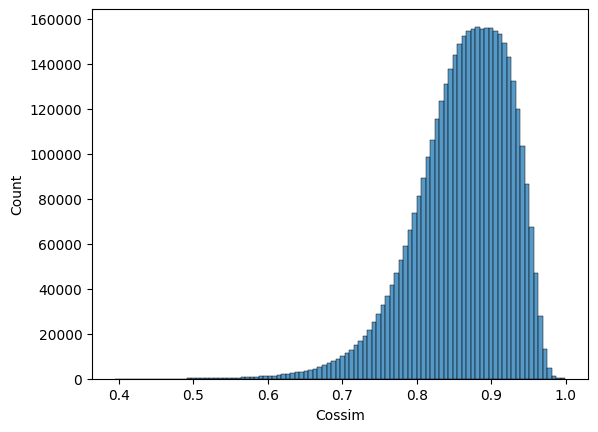

In [16]:
# plot the distribution of cosine similarities of context abundances between species
sns.histplot(1-cd, bins=100)
plt.xlabel('Cossim');

In [17]:
# number of species in each gene
cxt_df.gene.value_counts().loc[cxt_df.gene.unique()]

ND2      850
CO1      206
Cytb    1697
CO3      113
Name: gene, dtype: int64

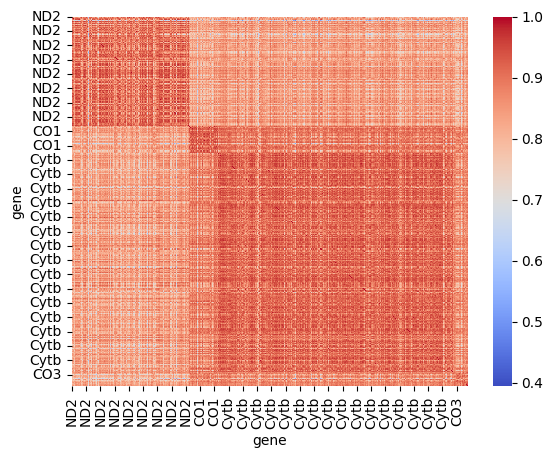

In [18]:
# plot heatmap of pairwise cossim between species
# ND2 is quite different
d = pd.DataFrame(1-sq, index=cxt_df.gene, columns=cxt_df.gene)
sns.heatmap(d, cmap='coolwarm');

### Let's plot these data on 2D space (PCA on contexts vectors)

In [28]:
# apply PCA on scaled vectors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

exp_wide = cxt_df[possible_codons]

# Scale data (divive each vector on vector's values sum)
scaled_data = (exp_wide.T / exp_wide.sum(axis=1)).T

# Perform PCA
pca = PCA(n_components=2, random_state=340)
pca_result = pca.fit_transform(scaled_data)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Gene'] = cxt_df['gene'].values
pca_df['Class'] = cxt_df['class'].values
pca_df = pca_df.sort_values('Gene')

# Get the variance share of each principal component
variance_ratio = pca.explained_variance_ratio_
variance_share_pc1 = round(variance_ratio[0]*100, 2)
variance_share_pc2 = round(variance_ratio[1]*100, 2)
print(f'PC1 ({variance_share_pc1}% variance)')
print(f'PC2 ({variance_share_pc2}% variance)')

PC1 (24.48% variance)
PC2 (21.85% variance)


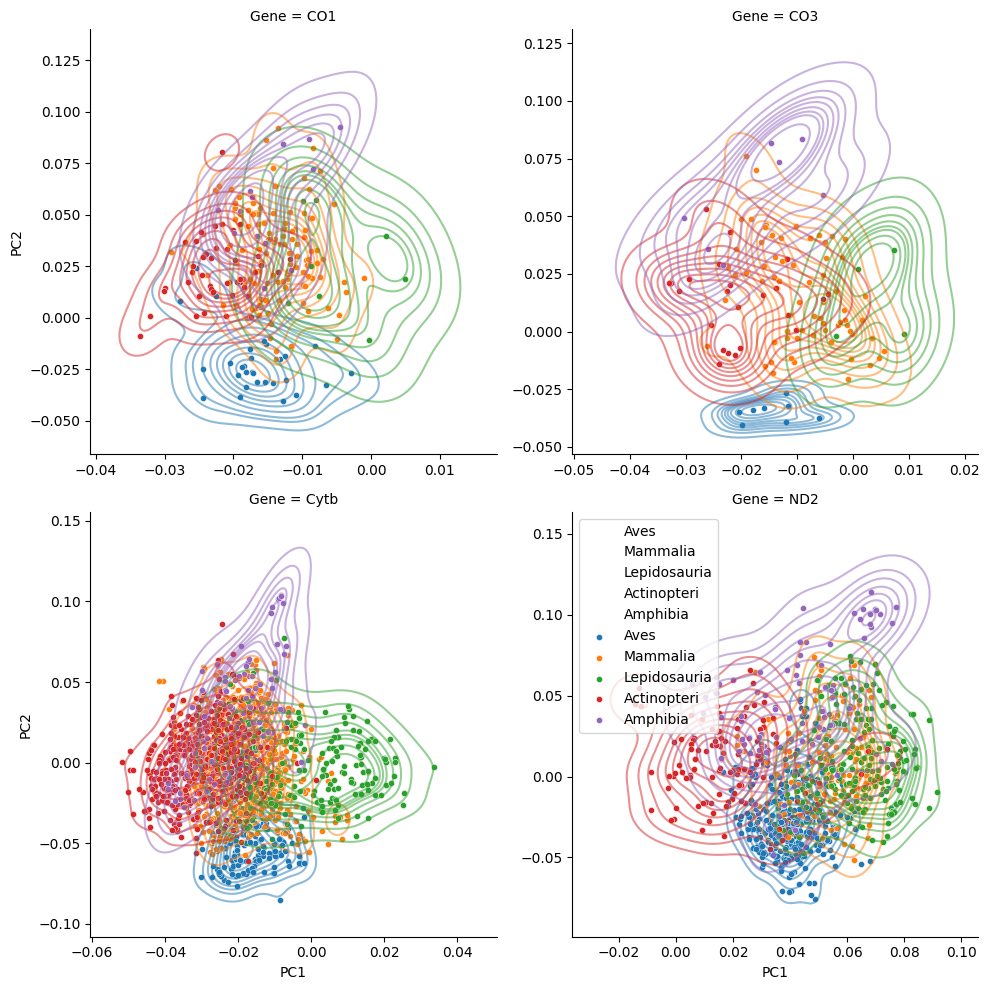

In [29]:
# High intersection of species by contexts
g = sns.FacetGrid(data=pca_df, col='Gene', height=5, hue='Class', 
                  col_wrap=2, sharex=False, sharey=False)
g.map(sns.kdeplot, 'PC1', 'PC2', alpha=0.5, label=False)
g.map(sns.scatterplot, 'PC1', 'PC2', s=20)
plt.legend()
plt.show()

## Compare all species and genes by expected synonymous **mutations frequences** using cossim

### Similarity Distributions

In [30]:
# pairwise compare by cosine distance
cd = pdist(exp_freqs[possible_sbs192], 'cosine')
sq = squareform(cd)

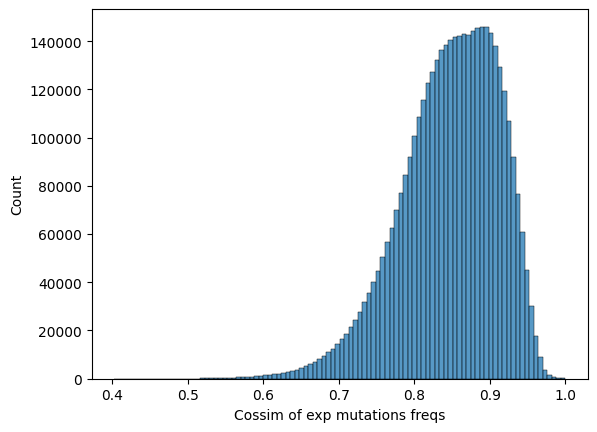

In [31]:
sns.histplot(1-cd, bins=100)
plt.xlabel('Cossim of exp mutations freqs');

<AxesSubplot:xlabel='gene', ylabel='gene'>

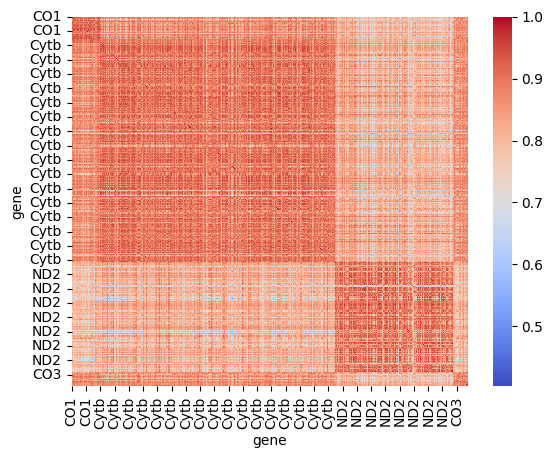

In [32]:
# heatmap of pairwise cossim
d = pd.DataFrame(1-sq, index=exp_freqs.gene, columns=exp_freqs.gene)
sns.heatmap(d, cmap='coolwarm')

### Let's plot exp mutations freqs on 2D space (PCA)

In [34]:
# show data for PCA
exp_freqs.set_index(['gene', 'class', 'species'])[possible_sbs192]

A[A>C]A  A[A>C]C  A[A>C]G  A[A>C]T  \
gene class       species                                                        
CO1  Mammalia    Crocuta_crocuta               0.0      0.0      0.0      0.0   
                 Homo_sapiens                  0.0      0.0      0.0      0.0   
                 Eothenomys_melanogaster       0.0      0.0      0.0      0.0   
                 Geomys_arenarius              0.0      0.0      0.0      0.0   
                 Urocyon_cinereoargenteus      0.0      0.0      0.0      0.0   
...                                            ...      ...      ...      ...   
CO3  Mammalia    Pan_troglodytes               0.0      0.0      0.0      0.0   
                 Bison_priscus                 0.0      0.0      0.0      0.0   
                 Martes_zibellina              0.0      0.0      0.0      0.0   
                 Trachypithecus_phayrei        0.0      0.0      0.0      0.0   
     Actinopteri Cottus_gulosus                0.0      0.0      0.0      0.0   

                                             C[A>C]A    C[A>C]C    C[A>C]G  \
gene class       species                                                     
CO1  Mammalia    Crocuta_crocuta           13.666667  10.800000  17.933333   
                 Homo_sapiens               6.060120   6.979960  17.963928   
                 Eothenomys_melanogaster    8.238095  10.714286  27.142857   
                 Geomys_arenarius          10.083333  10.750000  24.250000   
                 Urocyon_cinereoargenteus  11.529412   5.529412  11.235294   
...                                              ...        ...        ...   
CO3  Mammalia    Pan_troglodytes            5.044776   7.835821   7.641791   
                 Bison_priscus              8.000000   4.677419   6.000000   
                 Martes_zibellina           5.966667   7.066667   7.566667   
                 Trachypithecus_phayrei     8.545455   4.909091   7.818182   
     Actinopteri Cottus_gulosus             7.916667   3.083333   9.333333   

                                             C[A>C]T   G[A>C]A   G[A>C]C  ...  \
gene class       species                                                  ...   
CO1  Mammalia    Crocuta_crocuta           10.200000  5.133333  1.000000  ...   
                 Homo_sapiens              11.002004  7.807615  1.000000  ...   
                 Eothenomys_melanogaster   16.000000  5.857143  3.714286  ...   
                 Geomys_arenarius          13.416667  4.083333  1.000000  ...   
                 Urocyon_cinereoargenteus   7.549020  6.960784  3.098039  ...   
...                                              ...       ...       ...  ...   
CO3  Mammalia    Pan_troglodytes            6.373134  1.000000  1.373134  ...   
                 Bison_priscus              3.032258  2.903226  0.903226  ...   
                 Martes_zibellina           7.000000  3.000000  2.066667  ...   
                 Trachypithecus_phayrei     7.045455  2.136364  2.136364  ...   
     Actinopteri Cottus_gulosus             7.083333  2.000000  2.083333  ...   

                                             C[T>G]G   C[T>G]T   G[T>G]A  \
gene class       species                                                   
CO1  Mammalia    Crocuta_crocuta           15.133333  9.800000  4.866667   
                 Homo_sapiens              12.016032  3.010020  1.997996   
                 Eothenomys_melanogaster    6.238095  2.761905  2.190476   
                 Geomys_arenarius          13.500000  9.666667  8.666667   
                 Urocyon_cinereoargenteus  11.568627  3.450980  4.980392   
...                                              ...       ...       ...   
CO3  Mammalia    Pan_troglodytes            1.014925  3.910448  1.000000   
                 Bison_priscus              3.032258  4.709677  0.000000   
                 Martes_zibellina           1.000000  2.000000  0.000000   
                 Trachypithecus_phayrei     3.000000  4.636364  0.136364   
     Act

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

exp_wide = exp_freqs[possible_sbs192]

# Scale data
scaled_data = (exp_wide.T / exp_wide.sum(axis=1)).T

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Gene'] = exp_freqs['gene'].values
pca_df['Class'] = exp_freqs['class'].values
pca_df = pca_df.sort_values('Gene')

# Get the variance share of each principal component
variance_ratio = pca.explained_variance_ratio_
variance_share_pc1 = round(variance_ratio[0]*100, 2)
variance_share_pc2 = round(variance_ratio[1]*100, 2)
print(f'PC1 ({variance_share_pc1}% variance)')
print(f'PC2 ({variance_share_pc2}% variance)')

PC1 (25.6% variance)
PC2 (16.54% variance)


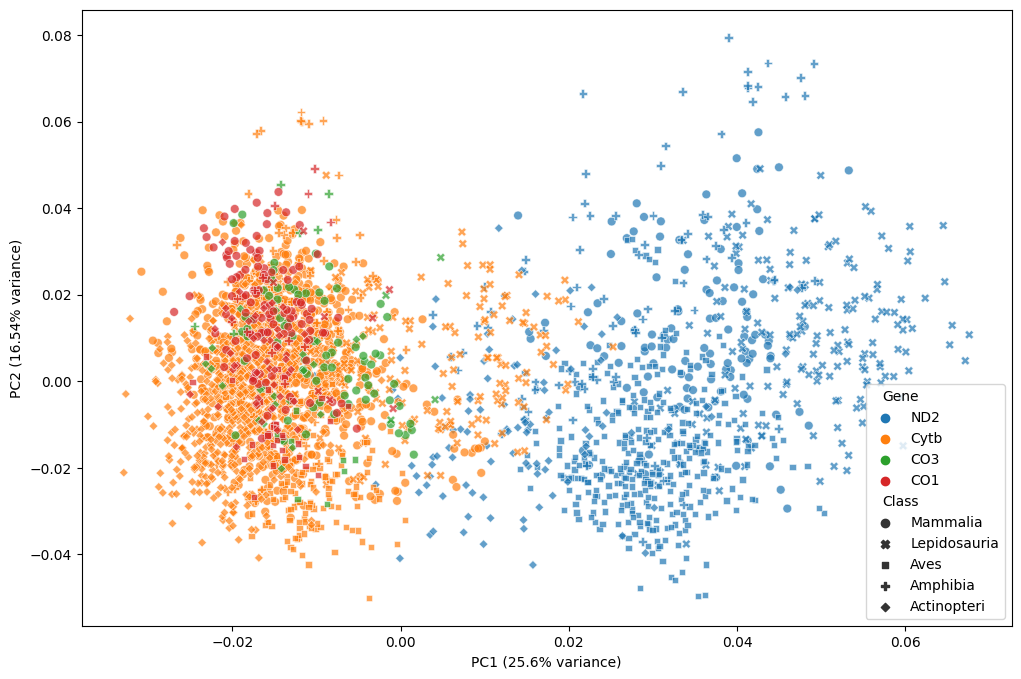

In [36]:
# Visualize total PCA results
# ND2 has quite different contexts ans therefore different expected mutations
plt.figure(figsize=(12, 8))
g = sns.scatterplot(
    data=pca_df.sort_values(['Gene', 'Class'], ascending=False),
    x="PC1", y="PC2", hue="Gene", style='Class',
    s=40, alpha=0.7,
)
plt.xlabel(f'PC1 ({variance_share_pc1}% variance)')
plt.ylabel(f'PC2 ({variance_share_pc2}% variance)')
plt.savefig('./pca_exp_all_genes.png')
plt.show()

192 comp; CO1


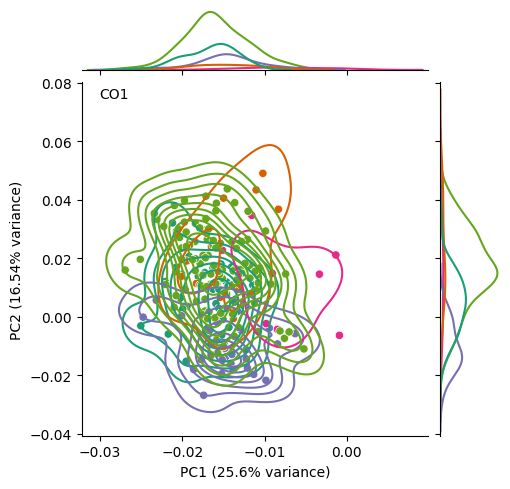

192 comp; CO3


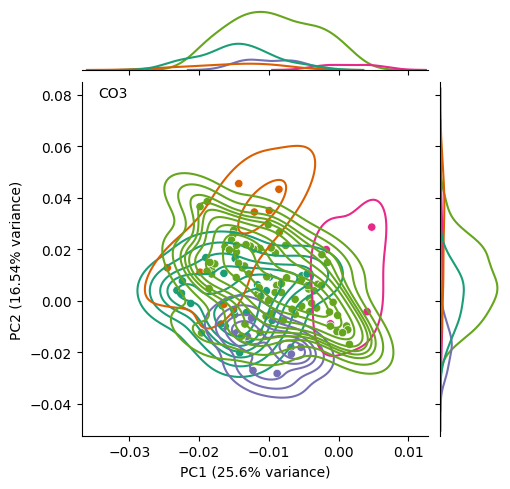

192 comp; Cytb


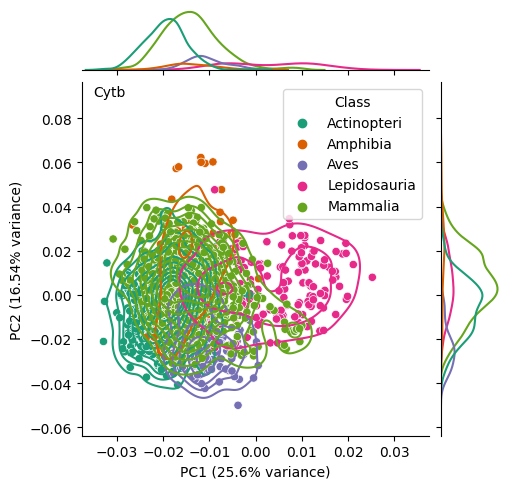

192 comp; ND2


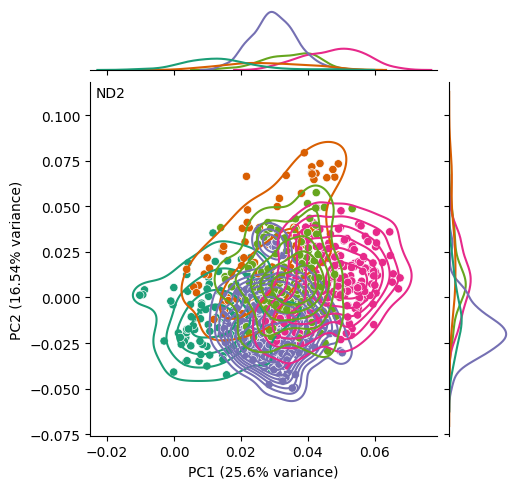

In [38]:
# plot genes separately 

for x in pca_df.Gene.unique():
    # Visualize the PCA resultsexp_wide
    g = sns.jointplot(
        data=pca_df[pca_df.Gene == x].sort_values('Class'),
        x="PC1", y="PC2", hue="Class",
        palette='Dark2',
        s=10,
        height=5, kind='kde'
    )
    g.plot_joint(sns.scatterplot)#, palette='Dark2', s=10, zorder=0, levels=6)
    plt.xlabel(f'PC1 ({variance_share_pc1}% variance)')
    plt.ylabel(f'PC2 ({variance_share_pc2}% variance)')

    # plot gene label on the plot
    _x = g.ax_joint.get_xlim()[0]
    _y = g.ax_joint.get_ylim()[1]
    _x -= _x / 15
    _y -= _y / 15
    plt.text(_x, _y, x)

    print('192 comp; ' + x)
    if x != 'Cytb':
        g.ax_joint.get_legend().remove()
    plt.savefig(f'./pca_exp_{x}.png')
    plt.show()